In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from matplotlib import pyplot as plt

### No forward differences for features since 1997

In [2]:
rfc = RandomForestRegressor()
df = pd.read_csv('V3_data_1997.csv', index_col='DATE')
features = list(df.columns)
features.remove('Housing_Price_Index')
idx = df.index
X = df[features]
y = df['Housing_Price_Index']

In [3]:
rfc.fit(X, y)
list(zip(X.columns[np.argsort(rfc.feature_importances_)], np.sort(rfc.feature_importances_)))

[('Unemp_Rate', 0.02419374865345882),
 ('Rental_Vac_Rate', 0.04800202704265669),
 ('SNAP', 0.059628782727820046),
 ('Population', 0.18240384585864497),
 ('Consumption_HH', 0.21854670558607864),
 ('Med_Income_SL', 0.2278270498282838),
 ('Per_Cap_Pers_Income', 0.23939784030305716)]

### First forward difference for features since 1997

In [4]:
df = pd.read_csv('V3_data_1997.csv', index_col='DATE')
cols = df.columns
idx = df.index
rfc = RandomForestRegressor()
# Take the first forward difference
data = np.array(df)[1:]- np.roll(np.array(df), 1, axis=0)[1:]
df = pd.DataFrame(data)
df.columns = cols
df.index = idx[1:]
X = df[features]
# Normalize
X = (X-X.mean())/X.std()
y = df['Housing_Price_Index']
y = (y-y.mean())/y.std()

In [5]:
rfc.fit(X, y)
list(zip(X.columns[np.argsort(rfc.feature_importances_)], np.sort(rfc.feature_importances_)))

[('Med_Income_SL', 0.013321741325400262),
 ('Consumption_HH', 0.018918539548376193),
 ('Per_Cap_Pers_Income', 0.023116481689201246),
 ('Rental_Vac_Rate', 0.02447132161490023),
 ('Population', 0.03242709319917726),
 ('Unemp_Rate', 0.22865141491978913),
 ('SNAP', 0.6590934077031556)]

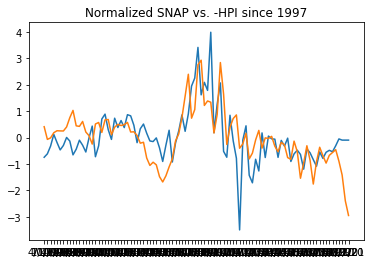

In [6]:
plt.plot(X['SNAP'])
plt.plot(-y)
plt.title("Normalized SNAP vs. -HPI since 1997")
plt.show()

### No forward difference for features since 2010

In [7]:
rfc = RandomForestRegressor()
df = pd.read_csv('V3Data_2010.csv', index_col='DATE')
features = list(df.columns)
features.remove('Housing_Price_Index')
idx = df.index
X = df[features]
y = df['Housing_Price_Index']

In [8]:
rfc.fit(X, y)
list(zip(X.columns[np.argsort(rfc.feature_importances_)], np.sort(rfc.feature_importances_)))

[('Net_Mig_Flow_UT_County', 0.004414194376106293),
 ('Percent_Single', 0.006138216998932646),
 ('Income_Ineq_SL', 0.006933445907342795),
 ('Rental_Vac_Rate', 0.009478052841555224),
 ('Med_Income_SL', 0.03654912428887391),
 ('Population', 0.055615417994383486),
 ('Median_Income', 0.060440384896761866),
 ('Consumption_HH', 0.06480635357707824),
 ('Educ_Attain', 0.08201623942719267),
 ('Per_Cap_Pers_Income', 0.08513009893433922),
 ('Unemp_Rate', 0.1669078723823234),
 ('GDP', 0.18315946702554578),
 ('SNAP', 0.23841113134956432)]

### First forward difference for features since 2010

In [9]:
df = pd.read_csv('V3Data_2010.csv', index_col='DATE')
cols = df.columns
idx = df.index
rfc = RandomForestRegressor()
# Take the first forward difference
data = np.array(df)[1:]- np.roll(np.array(df), 1, axis=0)[1:]
df = pd.DataFrame(data)
df.columns = cols
df.index = idx[1:]
X = df[features]
# Normalize
X = (X-X.mean())/X.std()
y = df['Housing_Price_Index']
y = (y-y.mean())/y.std()

In [10]:
rfc.fit(X, y)
list(zip(X.columns[np.argsort(rfc.feature_importances_)], np.sort(rfc.feature_importances_)))

[('Per_Cap_Pers_Income', 0.00425677009624445),
 ('Educ_Attain', 0.007902541816883935),
 ('Consumption_HH', 0.008410556166855954),
 ('Population', 0.009954686913946078),
 ('Rental_Vac_Rate', 0.010694777624193404),
 ('Net_Mig_Flow_UT_County', 0.0108298584039688),
 ('Med_Income_SL', 0.01200778187457798),
 ('Median_Income', 0.01255365712667929),
 ('Percent_Single', 0.01636552943500914),
 ('Income_Ineq_SL', 0.021146522612027555),
 ('Unemp_Rate', 0.106287528768783),
 ('GDP', 0.17078984953367232),
 ('SNAP', 0.6087999396271583)]

### No forward difference for features since 2017

In [42]:
rfc = RandomForestRegressor()
df = pd.read_csv('V3_data_2017.csv', index_col='DATE')
features = list(df.columns)
features.remove('Housing_Price_Index')
idx = df.index
X = df[features]
y = df['Housing_Price_Index']

0
100
200
300
400
500
600
700
800
900


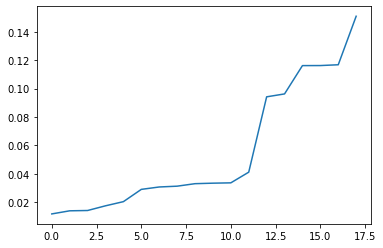

In [43]:
importances = []
for i in range(1000):
    if i % 100 == 0:
        print(i)
    rfc = RandomForestRegressor()
    rfc.fit(X, y)
    importances.append(rfc.feature_importances_)
avg_imp = np.mean(np.array(importances), axis=0)
import_pairs = list(zip(X.columns[np.argsort(avg_imp)], np.sort(avg_imp)))
plt.plot(np.sort(avg_imp))
plt.show()

In [44]:
import_pairs

[('Med_Price_Per_SQF', 0.011720580869692441),
 ('Med_Days_Mkt', 0.013907156596844609),
 ('Active_List_SL', 0.01412597626312668),
 ('Educ_Attain', 0.017428659017338637),
 ('Percent_Single', 0.02035624612352274),
 ('Net_Mig_Flow_UT_County', 0.02900281586386352),
 ('Housing_Auth', 0.030686088890374535),
 ('Income_Ineq_SL', 0.03125496393425586),
 ('Med_Income_SL', 0.0330126817860962),
 ('Median_Income', 0.033366043230121774),
 ('Consumption_HH', 0.03360028255462239),
 ('Rental_Vac_Rate', 0.0411239576027475),
 ('Active_List_UT_County', 0.09417279125875089),
 ('Unemp_Rate', 0.0962187064830231),
 ('Per_Cap_Pers_Income', 0.1161579054133143),
 ('GDP', 0.1161933209933109),
 ('Population', 0.11675481329516027),
 ('SNAP', 0.15091700982383413)]

0
100
200
300
400
500
600
700
800
900


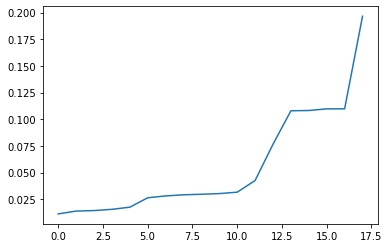

In [45]:
# Normalize
X = (X-X.mean())/X.std()
y = (y-y.mean())/y.std()
importances = []
for i in range(1000):
    if i % 100 == 0:
        print(i)
    rfc = RandomForestRegressor()
    rfc.fit(X, y)
    importances.append(rfc.feature_importances_)
avg_imp = np.mean(np.array(importances), axis=0)
import_pairs_norm = list(zip(X.columns[np.argsort(avg_imp)], np.sort(avg_imp)))
plt.plot(np.sort(avg_imp))
plt.show()

In [46]:
import_pairs_norm

[('Med_Price_Per_SQF', 0.011305465675771838),
 ('Active_List_SL', 0.013971644761599539),
 ('Med_Days_Mkt', 0.0144385424892982),
 ('Educ_Attain', 0.01559576548276924),
 ('Percent_Single', 0.017606130777795534),
 ('Net_Mig_Flow_UT_County', 0.026420460714174004),
 ('Consumption_HH', 0.028163890078355937),
 ('Med_Income_SL', 0.029221354805805726),
 ('Median_Income', 0.029721701343313686),
 ('Housing_Auth', 0.030358275367946407),
 ('Income_Ineq_SL', 0.031679333523641835),
 ('Rental_Vac_Rate', 0.04260815710104472),
 ('Active_List_UT_County', 0.07660000132527581),
 ('GDP', 0.10797636950890678),
 ('Unemp_Rate', 0.1082142483506675),
 ('Per_Cap_Pers_Income', 0.10975698837331953),
 ('Population', 0.10981354590496974),
 ('SNAP', 0.19654812441534436)]

### First forward difference for features since 2017

In [13]:
df = pd.read_csv('V3_data_2017.csv', index_col='DATE')
cols = df.columns
idx = df.index
rfc = RandomForestRegressor()
# Take the first forward difference
data = np.array(df)[1:]- np.roll(np.array(df), 1, axis=0)[1:]
df = pd.DataFrame(data)
df.columns = cols
df.index = idx[1:]
X = df[features]
# Normalize
X = (X-X.mean())/X.std()
y = df['Housing_Price_Index']
y = (y-y.mean())/y.std()

In [14]:
rfc.fit(X, y)
list(zip(X.columns[np.argsort(rfc.feature_importances_)], np.sort(rfc.feature_importances_)))

[('Median_Income', 0.0001494306062090808),
 ('Consumption_HH', 0.0017737529562152383),
 ('Med_Income_SL', 0.0019960907853572326),
 ('Educ_Attain', 0.002043332752289908),
 ('Income_Ineq_SL', 0.0020766938558739643),
 ('Net_Mig_Flow_UT_County', 0.0022822609889927804),
 ('Rental_Vac_Rate', 0.004582160162759119),
 ('Population', 0.0053008428492898295),
 ('Percent_Single', 0.0058862562529417356),
 ('Unemp_Rate', 0.006375308215688595),
 ('Per_Cap_Pers_Income', 0.00872931473439784),
 ('Active_List_SL', 0.019287861836559964),
 ('GDP', 0.03925982797669701),
 ('Active_List_UT_County', 0.05434429092376244),
 ('Med_Days_Mkt', 0.13516364929124666),
 ('Housing_Auth', 0.18387797517887547),
 ('Med_Price_Per_SQF', 0.20816056354746218),
 ('SNAP', 0.31871038708538113)]